# Machine Learning
## Project

##0. Environment settings

In [ ]:
# Import libraries

from keras import layers
from keras.layers import Input, Dense, Activation, LSTM, RepeatVector, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from numpy import quantile, where, random

import os

import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Drive mounting in Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##1. Data examination

In [ ]:
# Define the path to the dataset
path_to_dataset = '/content/gdrive/My Drive/ML - Projet/x_train.csv'

# Load the dataset
dataset = pd.read_csv(path_to_dataset)

# Get the dataset length
print('\nDataset length (rows, columns) :')
print(dataset.shape)

# Check the number of null values for each column
print('\nNumber of null values :')
print(dataset.isnull().sum())

# Get dataset feature names
print('\nDataset feature names :')
print(dataset.columns)

# Get data from the 5 first rows
print('\nData from 5 first rows :')
print(dataset.head(5))

# Get data from the 5 last rows
print('\nData from 5 last rows :')
print(dataset.tail(5))

# Get the whole data
print('\nWhole dataset :')
print(dataset)


Dataset length (rows, columns) :
(15360, 12)

Number of null values :
Unnamed: 0    0
cfo_demod     0
gain_imb      0
iq_imb        0
or_off        0
quadr_err     0
m_power       0
ph_err        0
mag_err       0
evm           0
Tosc          0
Tmix          0
dtype: int64

Dataset feature names :
Index(['Unnamed: 0', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err',
       'm_power', 'ph_err', 'mag_err', 'evm', 'Tosc', 'Tmix'],
      dtype='object')

Data from 5 first rows :
   Unnamed: 0   cfo_demod  gain_imb     iq_imb     or_off  quadr_err  \
0           0  592.234802  0.048079 -35.082729 -28.560846   1.993170   
1           1 -103.302032 -0.019917 -29.946953 -35.798664  -3.642311   
2           2 -582.331299  0.036379 -32.096672 -31.905628   2.835839   
3           3 -630.611267  0.063928 -38.216297 -30.084171   1.346316   
4           4 -415.526978 -0.055761 -29.180740 -36.601025  -3.963526   

    m_power    ph_err   mag_err       evm  Tosc  Tmix  
0 -0.499721  1.10792

##2. Data preprocessing

In [ ]:
# Import all the data
x_test_original = pd.read_csv('/content/gdrive/My Drive/ML - Projet/x_test.csv')
x_train_original = pd.read_csv('/content/gdrive/My Drive/ML - Projet/x_train.csv')
y_train_original = pd.read_csv('/content/gdrive/My Drive/ML - Projet/y_train.csv')

# Work on copies of the original files
x_test = x_test_original.copy()
x_train = x_train_original.copy()
y_train = y_train_original.copy()

# Get only y_train useful data (column 2)
print('\ny_train :\n', y_train)
y_train_column2 = y_train['target']

# Classifying y_train values into 8 different classes (from 1 to 8 (max value))
#y_train_encoded = to_categorical(y_train_column2, num_classes=None)  # 9 different classes (from 0 to 8 (max value))
y_train_encoded = pd.get_dummies(y_train_column2)
print('\ny_train_encoded :\n', y_train_encoded)

# Remove unwanted features (m_power, tosc, tmix)
x_test = x_test.drop(['Unnamed: 0','m_power', 'Tosc', 'Tmix'], axis=1)
x_train = x_train.drop(['Unnamed: 0','m_power', 'Tosc', 'Tmix'], axis=1)

# Check the features removing
print('\nx_test features :')
print(x_test.columns)
print('\nx_train features :')
print(x_train.columns)

# Classifying x_train values into different classes
x_train_encoded = pd.get_dummies(x_train)
print('\nx_train_encoded :', x_train_encoded)


y_train :
        Unnamed: 0  target
0               0       5
1               1       1
2               2       6
3               3       3
4               4       2
...           ...     ...
15355       15355       3
15356       15356       8
15357       15357       7
15358       15358       7
15359       15359       5

[15360 rows x 2 columns]

y_train_encoded :
        1  2  3  4  5  6  7  8
0      0  0  0  0  1  0  0  0
1      1  0  0  0  0  0  0  0
2      0  0  0  0  0  1  0  0
3      0  0  1  0  0  0  0  0
4      0  1  0  0  0  0  0  0
...   .. .. .. .. .. .. .. ..
15355  0  0  1  0  0  0  0  0
15356  0  0  0  0  0  0  0  1
15357  0  0  0  0  0  0  1  0
15358  0  0  0  0  0  0  1  0
15359  0  0  0  0  1  0  0  0

[15360 rows x 8 columns]

x_test features :
Index(['cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err', 'ph_err',
       'mag_err', 'evm'],
      dtype='object')

x_train features :
Index(['cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err', 'ph_err',
       

##3.  Model building

In [ ]:
# Creating the model
model = Sequential()

# Add input layer
model.add(Input(shape=(8,)))

# Add hidden layers
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# Add output layer
model.add(Dense(8, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


## 4. Model training

In [ ]:
# Split training data into train and validation
# (here 20% of the data will be used for the training and 80% for the testing)
X_train, X_test, Y_train, Y_test = train_test_split(x_train_encoded, y_train_encoded, test_size=0.2)
print('\nX_train shape :', X_train.shape)
print('X_test shape :', X_test.shape, '\n')

# Compile the model & Set the loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model training
history = model.fit(X_train, Y_train, epochs=300, batch_size=16, verbose=1)


X_train shape : (12288, 8)
X_test shape : (3072, 8) 

Epoch 1/300
768/768 [==============================] - 9s 5ms/step - loss: 0.4179 - accuracy: 0.2481
Epoch 2/300
768/768 [==============================] - 4s 6ms/step - loss: 0.3221 - accuracy: 0.2534
Epoch 3/300
768/768 [==============================] - 6s 8ms/step - loss: 0.3191 - accuracy: 0.2500
Epoch 4/300
768/768 [==============================] - 3s 4ms/step - loss: 0.3178 - accuracy: 0.2496
Epoch 5/300
768/768 [==============================] - 2s 3ms/step - loss: 0.3169 - accuracy: 0.2505
Epoch 6/300
768/768 [==============================] - 2s 3ms/step - loss: 0.3164 - accuracy: 0.2515
Epoch 7/300
768/768 [==============================] - 2s 3ms/step - loss: 0.3160 - accuracy: 0.2523
Epoch 8/300
768/768 [==============================] - 3s 4ms/step - loss: 0.3157 - accuracy: 0.2532
Epoch 9/300
768/768 [==============================] - 2s 3ms/step - loss: 0.3154 - accuracy: 0.2511
Epoch 10/300
768/768 [==============

##5. Performance tuning

*   Number of hidden layers (with 16 neurons for each layer, activation='softmax', test_size=0.2, learning_rate=0.01, epochs=200, batch_size=16) :
  - 1: Loss = 33.08% ; Acc = 25.21%
  - **2: Loss = 37.27% ; Acc = 26.58%**
  - 3: Loss = 37.68% ; Acc = 12.75%
  - 5: Loss = 37.68% ; Acc = 12.87%
  - 8: Loss = 37.68% ; Acc = 12.66%

**Best score with 2 hidden layers (16 & 16 neurons)**


*   Number of neurons (2 hidden layers, activation='softmax', test_size=0.2, learning_rate=0.01, epochs=200, batch_size=16) : 
  - 4, 4: Loss = 32.06 % ; Acc = 25.74%
  -	4, 8: Loss = 32.11 % ; Acc = 26.16%
  -	4, 16:	 Loss = 32.17% ; Acc = 27.61%
  -	**8, 4: Loss = 26.61% ; Acc = 37.28%**
  -	8, 8: Loss = 33.24% ; Acc = 25.09%
  -	8, 16: Loss = 32.20% ; Acc = 26.48%
  -	16, 4: Loss = 26.64% ; Acc = 37.63%
  -	16, 8: Loss = 26.60%% ; Acc = 37.00%
  -	16, 16: Loss = 32.54% ; Acc = 24.92%

**Best score is 8 neurons for the first hidden layer and 4 for the second hidden layer, because easier to compute than 16,4 and 16,8**


*   learning_rate (2 hidden layers, 8 and 4 neurons, activation='softmax', test_size=0.2, epochs=100, batch_size=16, values are decreased because of 100 epochs instead of 200 for optimize time of testing) : 
  - 0.001: Loss = 38.12% ; Acc = 13.80%
  - **0.01: Loss = 32.66% ; Acc = 27.40%**
  - 0.1: Loss = 31.55% ; Acc = 24.66%
  - 0.5: Loss = 31.46% ; Acc = 24.76%
  -	1.0: Loss = 31.48% ; Acc = 24.34%

**Best score with learning_rate = 0,01**


*   epochs (2 hidden layers, 8 and 4 neurons, activation='softmax', test_size=0.2, learning_rate=0.01, batch_size=16) :
  - 10: Loss = 38.20% ; Acc = 13.07%
  - 20: Loss = 36.60% ; Acc = 24.99%
  - 50: Loss = 36.95% ; Acc = 32.71%
  - 100: Loss = 32.66% ; Acc = 27.40%
  - **200: Loss = 26.61% ; Acc = 37.28%**
  - 1000: Loss = 31.55% ; Acc = 25.18%
  - 2000: Loss = 31.49% ; Acc = 25.11%

**Best score with epochs=200 . It seems that when increasing number of epochs, Loss tends to 0% and Accuracy tends to 37,5%.**


*   batch_size (2 hidden layers, 8 and 4 neurons, activation='softmax', test_size=0.2, learning_rate=0.01, epochs=100, values are decreased because of 100 epochs instead of 200 for optimize time of testing) :
  - 8: Loss = 31.89% ; Acc = 25.38%
  - **16: Loss = 32.66% ; Acc = 27.40%**
  - 32: Loss = 36.01% ; Acc = 25.05%
  - 64: Loss = 37.39% ; Acc = 24.79%
  - 128: Loss = 37.62% ; Acc = 12.82%

**Best score with batch_size = 16**


*   test_size (2 hidden layers, 8 and 4 neurons,activation='softmax', learning_rate=0.01, epochs=100, batch_size=16, values are decreased because of 100 epochs instead of 200 for optimize time of testing) :
  -	0.1: Loss = 32.60% ; Acc = 25.05%
  -	0.15: Loss = 33.09% ; Acc = 24.70%
  -	**0.2: Loss = 32.66% ; Acc = 27.40%**
  -	0.5: Loss = 34.49% ; Acc = 24.57%
  -	1.0: Loss = 32.41% ; Acc = 25.37%

**Best score with test_size = 0,2**

*   activation function (2 hidden layers, 8 and 4 neurons, test_size=0.2, learning_rate=0.01, epochs=200, batch_size=16) :
  - elu: Loss = 37.68% ; Acc = 12.75%
  - selu: Loss = 30.27% ; Acc = 32.36%
  - sigmoïd: Loss = 31.80% ; Acc = 24.88%
  - softmax: Loss = 32.66% ; Acc = 27.40%
  - softplus: Loss = 23.45% ; Acc = 65.65%
  - softsign: Loss = 23.92% ; Acc = 49.36%
  -	**relu: Loss = 06.91% ; Acc = 93.37%**

**Best score with the relu activation function**

Finally, best score is obtained with these parameters:
*   2 hidden layers:
  - First one with 8 neurons;
  - Second one with 4 neurons;
*   test_size = 0.2;
*   learning_rate = 0.01;
*   epochs = 200;
*   batch_size = 16;
*   activation = relu;




##6. Model evaluation


Loss: 8.41%
Accuracy: 93.90%



Text(0, 0.5, 'Accuracy')

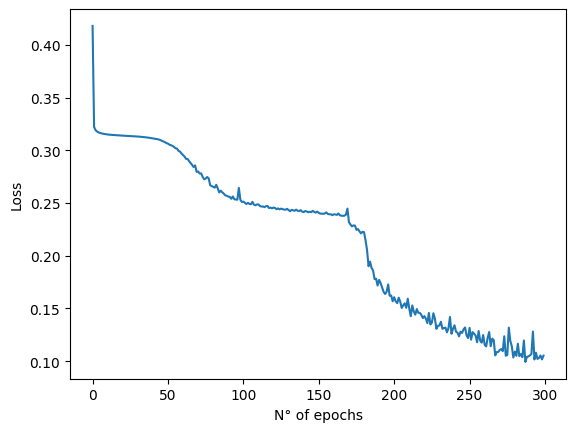

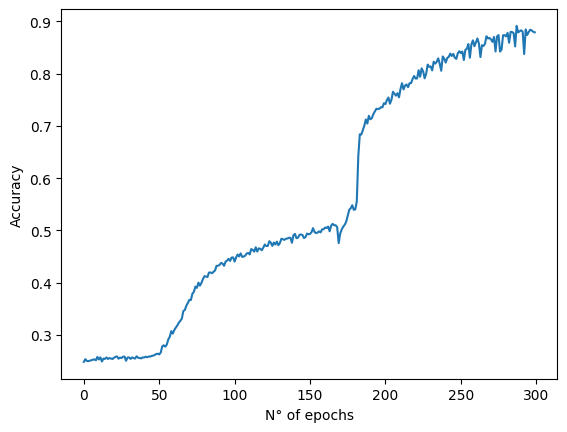

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)

# Create a model visualization
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Print final accuracy and loss
print('\nLoss: {:.2f}%'.format(loss*100))
print('Accuracy: {:.2f}%\n'.format(accuracy*100))

# Plot the Loss graphic
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('N° of epochs')
plt.ylabel('Loss')

# Plot the Accuracy graphic
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('N° of epochs')
plt.ylabel('Accuracy')

##7. Compare MLP to SVM

In [ ]:
# Split training data into train and validation
# (here 20% of the data will be used for the training and 80% for the testing)
X_train, X_test, Y_train, Y_test = train_test_split(x_train_encoded, y_train_column2, test_size=0.2)

# Create a SVM model
SVMmodel=SVC(kernel='linear') # Linear kernel will search for separate lines --> Definition of the kernel parameters

# Feed the SVM
SVMmodel.fit(X_train, Y_train)

# Check what are the parameters
SVMmodel.get_params()
print('SVM parameters :', SVMmodel.get_params())

# Check how good it classifies
SVMmodel.score(X_test, Y_test)
print('\nSVM score :', SVMmodel.score(X_test, Y_test))

SVM parameters : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVM score : 0.9996744791666666


##8. Feature engineering

In [ ]:
# CODE 8

##9. Kaggle CSV file generation

The final part of the project is to create a CSV file from Y_test values and import it on Kaggle.

In [ ]:
# Predict the model
y_pred = model.predict(x_test)

# Display y_pred
print('\ny_pred :')
print(y_pred.shape)
print(y_pred)

# Get column index of highest value for each line
y_test = np.argmax(y_pred, axis=1)
y_test = y_test.reshape(3840, 1)

# Add 1 à chaque ligne (Python index begins at 0 and not 1)
for i in range(len(y_test)):
  y_test[i] += 1

# Display y_test
print('\ny_test :')
print(y_test.shape)
print(y_test)

# Create the dataframe
y_test_dataframe = pd.DataFrame(y_test, columns=['target'])

# Save the dataframe into a CSV file 
y_test_dataframe.to_csv('y_test.csv', index_label='id') 

120/120 [==============================] - 0s 2ms/step

y_pred :
(3840, 8)
[[0.0000000e+00 1.2950662e-12 8.7162743e-22 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.7879547e-06 1.0012814e-08 2.0497985e-01 ... 6.7546658e-02
  2.4165729e-02 7.0254260e-01]
 [0.0000000e+00 3.1113391e-12 2.8173732e-22 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.3160762e-01 8.6816835e-01 3.6408139e-07 ... 2.2322607e-04
  4.1156403e-07 1.4032451e-09]
 [3.4067804e-09 4.4651574e-12 4.7012171e-01 ... 2.3783122e-03
  4.9618527e-02 4.7069883e-01]
 [6.4060044e-01 3.2636490e-01 1.4332822e-03 ... 3.0761456e-02
  1.8547650e-04 6.5439707e-04]]

y_test :
(3840, 1)
[[5]
 [8]
 [5]
 ...
 [2]
 [8]
 [1]]
